Importamos librerías

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

import sys
sys.path.append("..")
from src import sp_eda_limpieza
from src import sp_columnas_numericas
from src import sp_categorias_nulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df_limpieza_numericas=pd.read_csv(r'C:\Users\matis\Desktop\EDA_MARKETING\data\eda_limpieza_files\df_gestion_nulos_ok.csv',usecols=lambda col:not col.startswith('Unnamed'))

In [4]:
#Se identifican valores en mayúsculas y se importa el sp_eda_limpieza para pasarlos a mínúscula
sp_eda_limpieza.convertir_valores_minusculas(df_limpieza_numericas)

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Subscribed,Date,Latitude,Longitude,ID,City,Country,Region,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
23642,56.0,admin.,divorced,high_school,no,yes,no,telephone,196.0,3.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2017-11-05,41.803,-73.736,8c36229c-7aba-4abe-8b70-f9f79c1d0260,millbrook,united_states,new york,148584.0,0.0,0.0,2012-01-08,3.0


In [5]:
#creamos un df para estudiar las columnas numéricas
df_numeros=df_limpieza_numericas.select_dtypes(include=np.number)
df_numeros.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,37880.0,39.977112,10.437957,17.000,32.00000,38.0000,47.00000,98.000
Duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
Campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
Previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
Emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
Cons.price.idx,42529.0,93.574219,0.579548,92.201,93.07500,93.7490,93.99400,94.767
Cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.70000,-41.8000,-36.40000,-26.900
Euribor3m,33744.0,3.616521,1.737117,0.634,1.34400,4.8570,4.96100,5.045
Nr.employed,43000.0,5166.835721,72.337206,4964.000,5099.00000,5191.0000,5228.00000,5228.000
Latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384


Se identifican todas las columnas numéricas y se convierten a lista para iterar, excluyendo las Columnas Latitude y longitude

In [7]:
lista_eliminar=['Latitude','Longitude']
columnas_num=df_numeros.columns.tolist()
for col in lista_eliminar:
    columnas_num.remove(col)
columnas_num

['Age',
 'Duration',
 'Campaign',
 'Previous',
 'Emp.var.rate',
 'Cons.price.idx',
 'Cons.conf.idx',
 'Euribor3m',
 'Nr.employed',
 'Income',
 'Kidhome',
 'Teenhome',
 'NumWebVisitsMonth']

In [8]:
df_numeros[columnas_num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,37880.0,39.977112,10.437957,17.000,32.000,38.000,47.000,98.000
Duration,43000.0,257.739279,258.666033,0.000,102.000,179.000,319.000,4918.000
Campaign,43000.0,2.567233,2.772294,1.000,1.000,2.000,3.000,56.000
Previous,43000.0,0.174023,0.497366,0.000,0.000,0.000,0.000,7.000
Emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.800,1.100,1.400,1.400
Cons.price.idx,42529.0,93.574219,0.579548,92.201,93.075,93.749,93.994,94.767
Cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.700,-41.800,-36.400,-26.900
Euribor3m,33744.0,3.616521,1.737117,0.634,1.344,4.857,4.961,5.045
Nr.employed,43000.0,5166.835721,72.337206,4964.000,5099.000,5191.000,5228.000,5228.000
Income,20115.0,93087.213224,50614.798255,5852.000,49110.000,92962.000,136705.000,180791.000


In [9]:
df_numeros[columnas_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                37880 non-null  float64
 1   Duration           43000 non-null  float64
 2   Campaign           43000 non-null  float64
 3   Previous           43000 non-null  float64
 4   Emp.var.rate       43000 non-null  float64
 5   Cons.price.idx     42529 non-null  float64
 6   Cons.conf.idx      43000 non-null  float64
 7   Euribor3m          33744 non-null  float64
 8   Nr.employed        43000 non-null  float64
 9   Income             20115 non-null  float64
 10  Kidhome            20115 non-null  float64
 11  Teenhome           20115 non-null  float64
 12  NumWebVisitsMonth  20115 non-null  float64
dtypes: float64(13)
memory usage: 4.3 MB


Se comparan la media y la mediana para ver  como se comportan los datos y su relación entre la media y la mediana.
duration- tiene outlayers
Emp var rate tiene outlayers



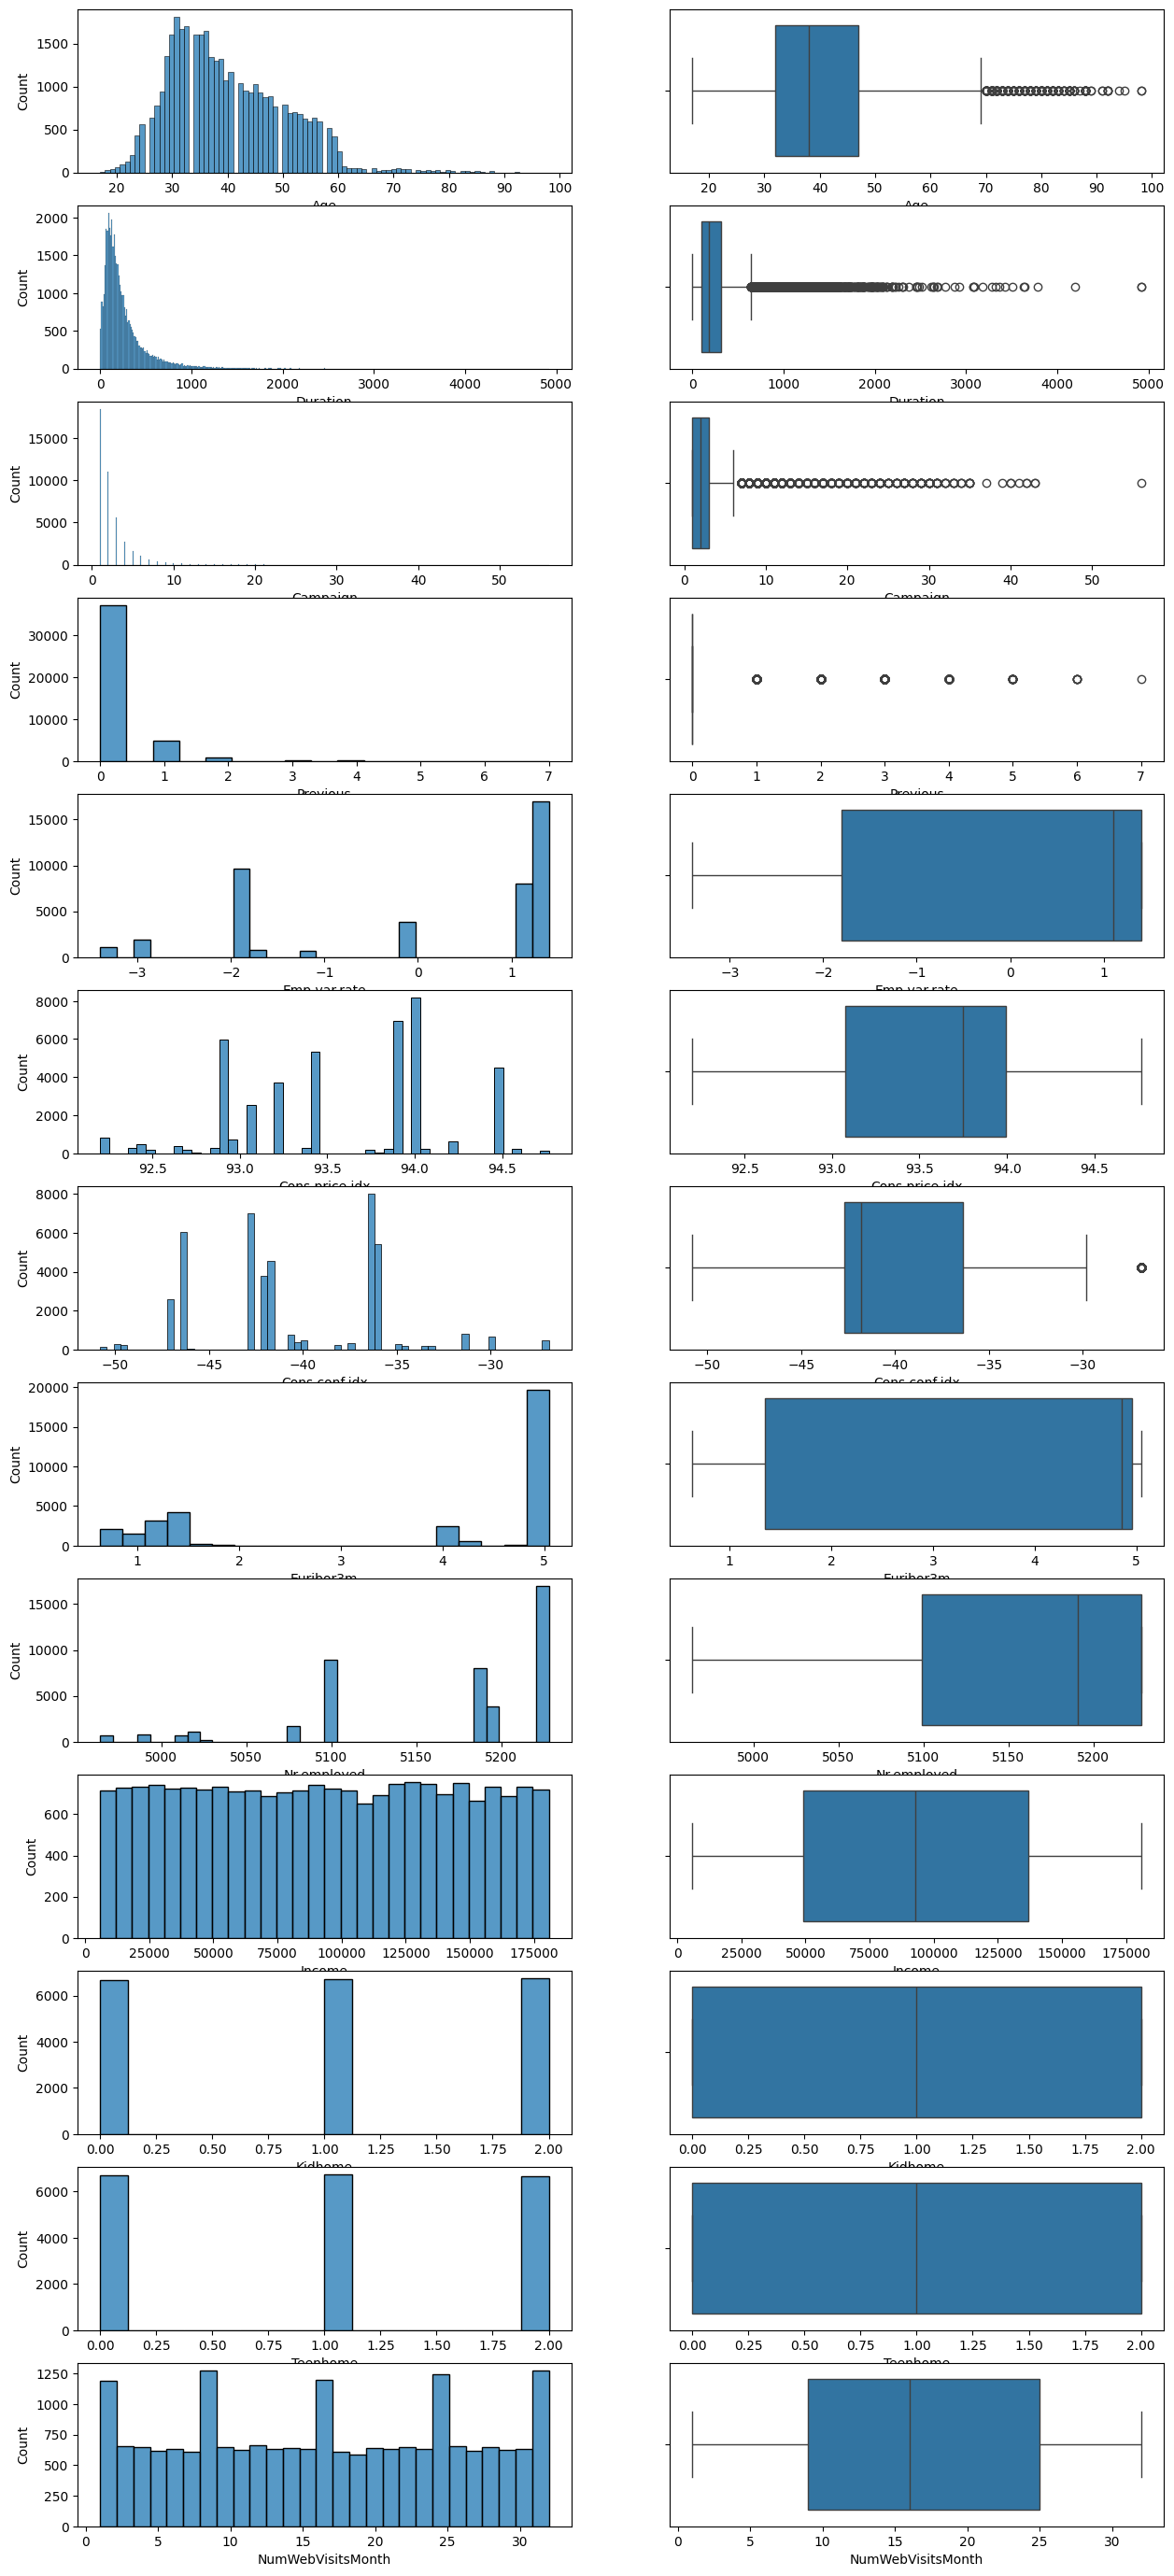

In [10]:
#calculamos las distribuciones histpot y boxplot para tedectar outlayers
sp_columnas_numericas.subplot_columnas_numericas(df_limpieza_numericas,columnas_num)


In [11]:
#se crea un diccionario con todos los valores que suponen el umbral de los outlayers
dicc_outliers={'Age':70,
               'Duration':700,
               'Campaign':6,
               'Previous':0,
               'Cons.conf.idx':-30}

for col, out in dicc_outliers.items():
    outliers=df_limpieza_numericas[col][df_limpieza_numericas[col]>out].count()
    print(f"Para la columna {col} temenos {outliers} outliers y represenatan un {round(outliers/df_limpieza_numericas[col].shape[0]*100,2)}% de los datos de la columna")

Para la columna Age temenos 401 outliers y represenatan un 0.93% de los datos de la columna
Para la columna Duration temenos 2545 outliers y represenatan un 5.91% de los datos de la columna
Para la columna Campaign temenos 2504 outliers y represenatan un 5.81% de los datos de la columna
Para la columna Previous temenos 5897 outliers y represenatan un 13.68% de los datos de la columna
Para la columna Cons.conf.idx temenos 754 outliers y represenatan un 1.75% de los datos de la columna


No se eliminan outlayers para ninguna columna de datos porque todos tienen un número significativo

In [12]:
#como antes se ha descartado las columnas laittude y longitude se vuelve a crear un dataframe con todas las columnas numéricas
df_numeros_todas=df_limpieza_numericas.select_dtypes(include=np.number)
#se crea una lista de todas las columnas numéricas que tengan nulos
nulos_columnas_num=df_numeros_todas.columns[df_numeros_todas.isnull().any()].tolist()

In [13]:
#se calcula el porcentaje de nulos del dataframe de limpieza de columnas numéricas para las columnas numéricas que tengan nulos
sp_categorias_nulos.calcular_nulos_columna(df_limpieza_numericas,nulos_columnas_num)

Age                  12.11
Duration              0.23
Campaign              0.23
Previous              0.23
Emp.var.rate          0.23
Cons.price.idx        1.32
Cons.conf.idx         0.23
Euribor3m            21.70
Nr.employed           0.23
Latitude              0.23
Longitude             0.23
Income               53.33
Kidhome              53.33
Teenhome             53.33
NumWebVisitsMonth    53.33
dtype: float64

In [14]:
#se analizan los null de las columnas numéricas con un umbral de l 5%
sp_columnas_numericas.analisis_columnas_numericas_null(df_limpieza_numericas,5)

,Column,Datatype,Nullcount,Null%
0,Age,float64,5217,12.105251
1,Duration,float64,97,0.225074
2,Campaign,float64,97,0.225074
3,Previous,float64,97,0.225074
4,Emp.var.rate,float64,97,0.225074
5,Cons.price.idx,float64,568,1.317957
6,Cons.conf.idx,float64,97,0.225074
7,Euribor3m,float64,9353,21.702207
8,Nr.employed,float64,97,0.225074
9,Latitude,float64,97,0.225074


(['Age', 'Euribor3m', 'Income', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth'],
 ['Duration',
  'Campaign',
  'Previous',
  'Emp.var.rate',
  'Cons.price.idx',
  'Cons.conf.idx',
  'Nr.employed',
  'Latitude',
  'Longitude'])

Empezamos a gestionar los nulos de las columnas por debajo del umbral:
- Rellenar con media si no hay outlayers
- Rellenar con mediana si hay outlayers


In [15]:
high_null_cols,low_null_cols=sp_columnas_numericas.analisis_columnas_numericas_null(df_limpieza_numericas)

,Column,Datatype,Nullcount,Null%
0,Age,float64,5217,12.105251
1,Duration,float64,97,0.225074
2,Campaign,float64,97,0.225074
3,Previous,float64,97,0.225074
4,Emp.var.rate,float64,97,0.225074
5,Cons.price.idx,float64,568,1.317957
6,Cons.conf.idx,float64,97,0.225074
7,Euribor3m,float64,9353,21.702207
8,Nr.employed,float64,97,0.225074
9,Latitude,float64,97,0.225074


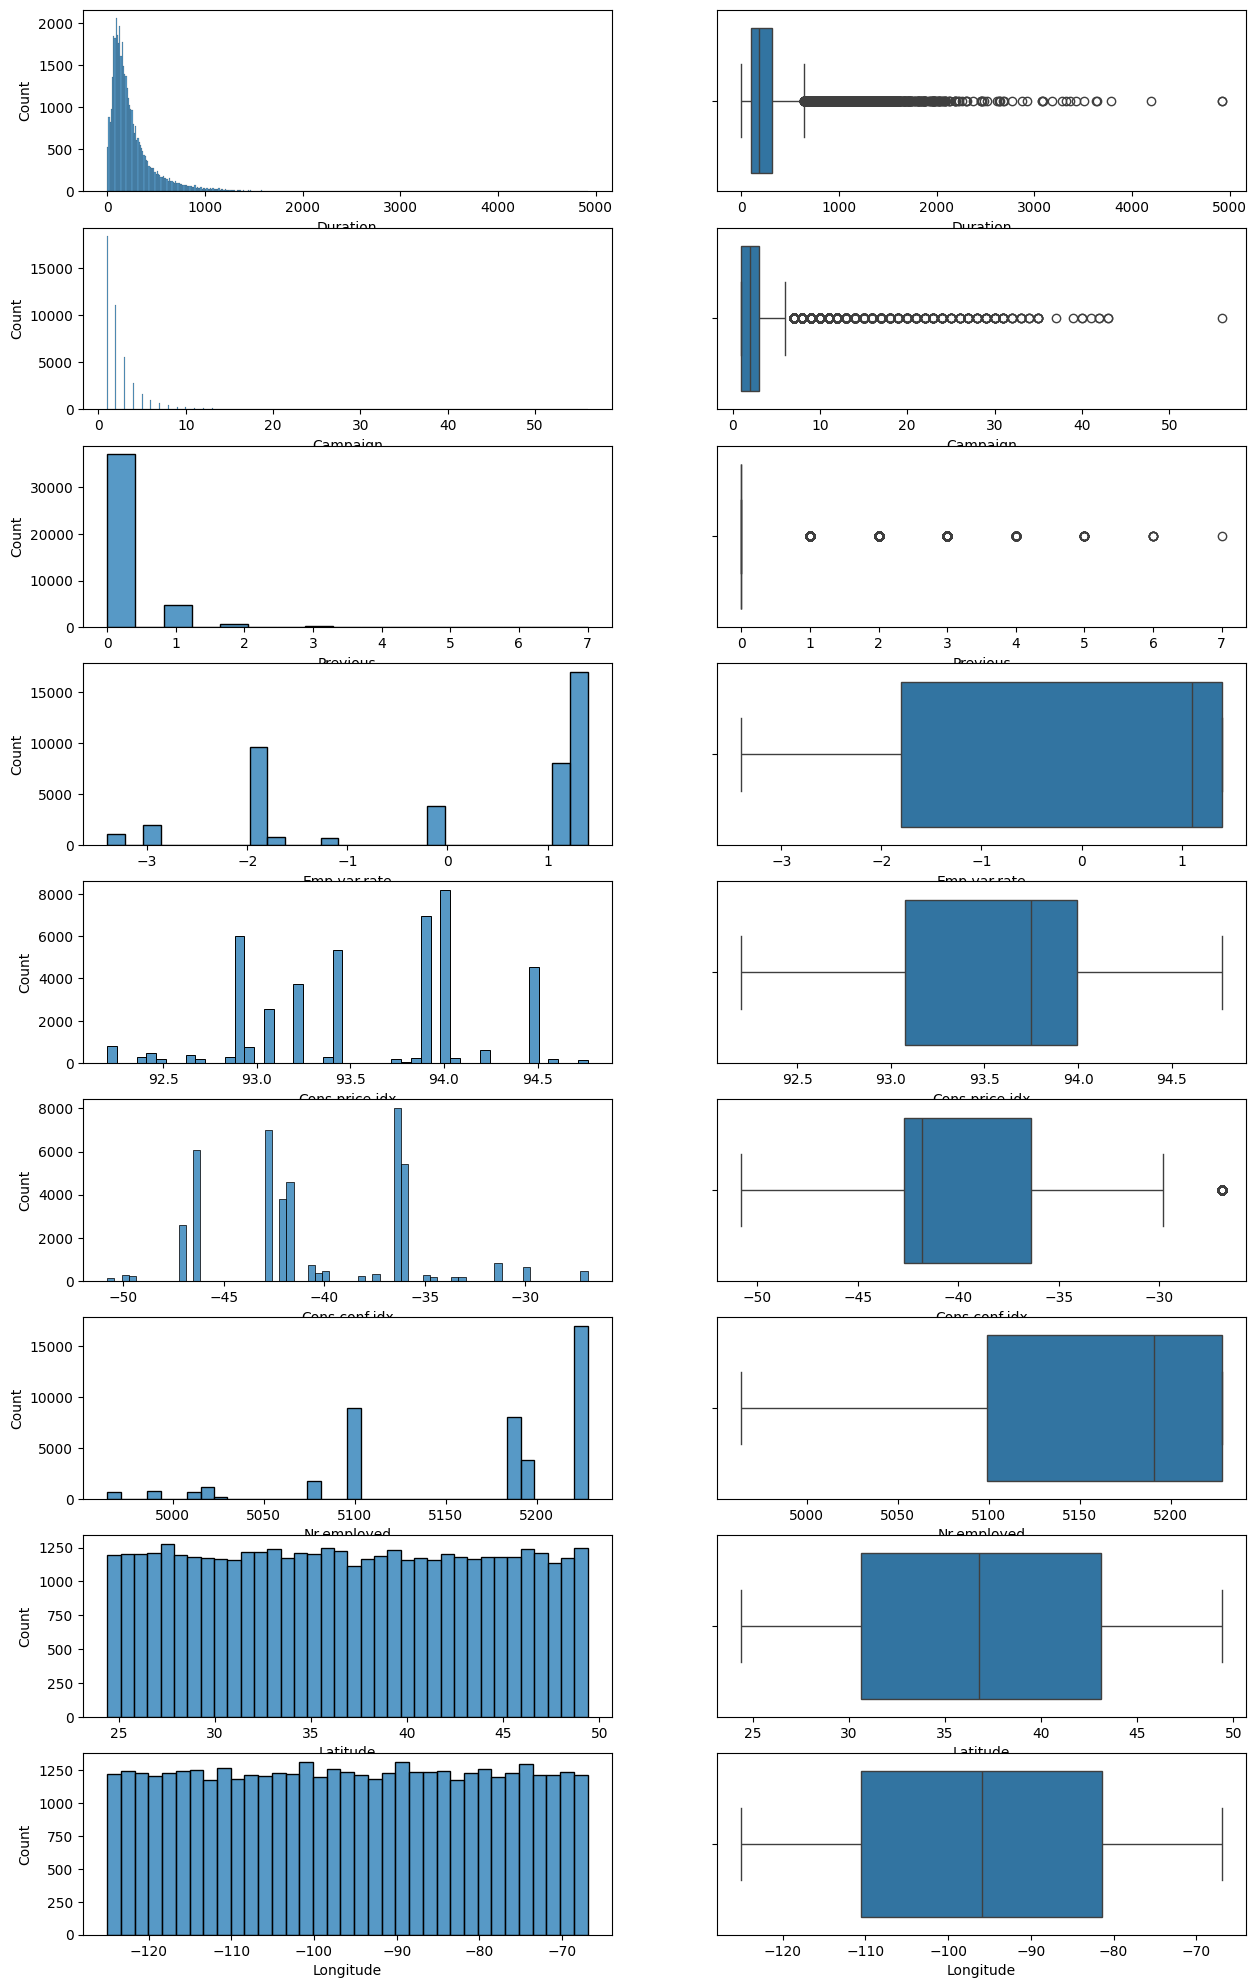

In [16]:
sp_columnas_numericas.subplot_columnas_numericas(df_limpieza_numericas,low_null_cols)

In [17]:
"""['Duration',
  'Campaign',
  'Previous',
  'Emp.var.rate',
  'Cons.price.idx',
  'Cons.conf.idx',
  'Nr.employed',
  'Latitude',
  'Longitude'])"""
#decido no hacer nada con latitude y longitude por no saber como efectuar la gestión de nulos

df_filled_simple=df_limpieza_numericas.fillna({
    "Duration": df_limpieza_numericas["Duration"].median(),
    "Campaign":df_limpieza_numericas["Campaign"].median(),
    "Previous": df_limpieza_numericas["Previous"].median(),
    "Emp.var.rate": df_limpieza_numericas["Emp.var.rate"].mean(),
    "Cons.price.idx": df_limpieza_numericas["Cons.price.idx"].median(),
    "Cons.conf.idx": df_limpieza_numericas["Cons.conf.idx"].median(),
    "Nr.employed": df_limpieza_numericas["Nr.employed"].mean(),
})

In [18]:
#se comprueba que la gestión de nulos es correcta

In [19]:
df_filled_simple[low_null_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,43097.0,257.562058,258.401710,0.000,102.00000,179.0000,318.00000,4918.000
Campaign,43097.0,2.565956,2.769302,1.000,1.00000,2.0000,3.00000,56.000
Previous,43097.0,0.173632,0.496874,0.000,0.00000,0.0000,0.00000,7.000
Emp.var.rate,43097.0,0.077128,1.572126,-3.400,-1.80000,1.1000,1.40000,1.400
Cons.price.idx,43097.0,93.576523,0.576061,92.201,93.07500,93.7490,93.99400,94.767
Cons.conf.idx,43097.0,-40.511954,4.632368,-50.800,-42.70000,-41.8000,-36.40000,-26.900
Nr.employed,43097.0,5166.835721,72.255752,4964.000,5099.00000,5191.0000,5228.00000,5228.000
Latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384
Longitude,43000.0,-95.939067,16.752282,-124.997,-110.49425,-95.8995,-81.42775,-66.937


In [20]:
df_limpieza_numericas[low_null_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
Campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
Previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
Emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
Cons.price.idx,42529.0,93.574219,0.579548,92.201,93.07500,93.7490,93.99400,94.767
Cons.conf.idx,43000.0,-40.509049,4.637186,-50.800,-42.70000,-41.8000,-36.40000,-26.900
Nr.employed,43000.0,5166.835721,72.337206,4964.000,5099.00000,5191.0000,5228.00000,5228.000
Latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384
Longitude,43000.0,-95.939067,16.752282,-124.997,-110.49425,-95.8995,-81.42775,-66.937


In [21]:
sp_categorias_nulos.calcular_nulos_columna(df_filled_simple,low_null_cols)

Duration          0.00
Campaign          0.00
Previous          0.00
Emp.var.rate      0.00
Cons.price.idx    0.00
Cons.conf.idx     0.00
Nr.employed       0.00
Latitude          0.23
Longitude         0.23
dtype: float64

In [220]:
#una vez comprobado que el cambio en los nulos tiene un resultado favorable se aplica al dataframe original df_limpieza_numericas

In [22]:
df_limpieza_numericas=df_limpieza_numericas.fillna({
    "Duration": df_limpieza_numericas["Duration"].median(),
    "Campaign":df_limpieza_numericas["Campaign"].median(),
    "Previous": df_limpieza_numericas["Previous"].median(),
    "Emp.var.rate": df_limpieza_numericas["Emp.var.rate"].mean(),
    "Cons.price.idx": df_limpieza_numericas["Cons.price.idx"].median(),
    "Cons.conf.idx": df_limpieza_numericas["Cons.conf.idx"].median(),
    "Nr.employed": df_limpieza_numericas["Nr.employed"].mean(),
})

In [23]:
sp_categorias_nulos.calcular_nulos_columna(df_limpieza_numericas,low_null_cols)

Duration          0.00
Campaign          0.00
Previous          0.00
Emp.var.rate      0.00
Cons.price.idx    0.00
Cons.conf.idx     0.00
Nr.employed       0.00
Latitude          0.23
Longitude         0.23
dtype: float64

Gestión de nulos de los valores superiores al umbral
-iterativeimputer para gestión de nulo para predecir valores

In [24]:
df_filled_simple[high_null_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,37880.0,39.977112,10.437957,17.000,32.000,38.000,47.000,98.000
Euribor3m,33744.0,3.616521,1.737117,0.634,1.344,4.857,4.961,5.045
Income,20115.0,93087.213224,50614.798255,5852.000,49110.000,92962.000,136705.000,180791.000
Kidhome,20115.0,1.004176,0.816811,0.000,0.000,1.000,2.000,2.000
Teenhome,20115.0,0.999503,0.815298,0.000,0.000,1.000,2.000,2.000
NumWebVisitsMonth,20115.0,16.540790,9.235324,1.000,9.000,16.000,25.000,32.000


In [25]:
df_filled_simple[high_null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                37880 non-null  float64
 1   Euribor3m          33744 non-null  float64
 2   Income             20115 non-null  float64
 3   Kidhome            20115 non-null  float64
 4   Teenhome           20115 non-null  float64
 5   NumWebVisitsMonth  20115 non-null  float64
dtypes: float64(6)
memory usage: 2.0 MB


#rellenar nulos mediante predicción usando sklern

In [26]:
sp_columnas_numericas.imputar_iterative(df_filled_simple,high_null_cols)

,count,mean,std,min,25%,50%,75%,max
Age_iterative,43097.0,39.977045,9.785807,17.000,33.000000,39.938296,46.000000,98.000
Euribor3m_iterative,43097.0,3.616490,1.537109,0.634,1.479000,4.076000,4.959000,5.045
Income_iterative,43097.0,93087.213251,34578.667355,5852.000,93087.196217,93087.213033,93087.238007,180791.000
Kidhome_iterative,43097.0,1.004147,0.558023,0.000,1.000000,1.003965,1.004434,2.000
Teenhome_iterative,43097.0,0.999430,0.557008,0.000,0.994121,1.000000,1.004669,2.000
NumWebVisitsMonth_iterative,43097.0,16.540733,6.309325,1.000,16.530898,16.540757,16.547091,32.000


(        Age           Job   Marital            Education Default Housing Loan  \
 0      22.0      services    single          high_school      no     yes   no   
 1      56.0    technician  divorced  professional_course      no      no   no   
 2      31.0   blue_collar   married             basic_9y      no      no   no   
 3      38.0   blue_collar    single    university_degree      no      no   no   
 4      39.0  entrepreneur   married             basic_6y      no     yes   no   
 ...     ...           ...       ...                  ...     ...     ...  ...   
 43092  37.0    unemployed   married    university_degree      no      no  yes   
 43093  30.0   blue_collar   married             basic_4y      no     yes   no   
 43094  40.0        admin.  divorced    university_degree      no     yes   no   
 43095   NaN    technician   married  professional_course      no     yes  yes   
 43096  34.0        admin.   married          high_school      no     yes   no   
 
          Cont

In [27]:
#dataframe con los nulos de hih null rellenados en las columnas que llevan_iterative

In [28]:
df_filled_iterative,col_iteradas=sp_columnas_numericas.imputar_iterative(df_filled_simple,high_null_cols)

,count,mean,std,min,25%,50%,75%,max
Age_iterative,43097.0,39.977045,9.785807,17.000,33.000000,39.938296,46.000000,98.000
Euribor3m_iterative,43097.0,3.616490,1.537109,0.634,1.479000,4.076000,4.959000,5.045
Income_iterative,43097.0,93087.213251,34578.667355,5852.000,93087.196217,93087.213033,93087.238007,180791.000
Kidhome_iterative,43097.0,1.004147,0.558023,0.000,1.000000,1.003965,1.004434,2.000
Teenhome_iterative,43097.0,0.999430,0.557008,0.000,0.994121,1.000000,1.004669,2.000
NumWebVisitsMonth_iterative,43097.0,16.540733,6.309325,1.000,16.530898,16.540757,16.547091,32.000


In [29]:
sp_categorias_nulos.calcular_nulos_columna(df_filled_iterative,col_iteradas)

Age_iterative                  0.0
Euribor3m_iterative            0.0
Income_iterative               0.0
Kidhome_iterative              0.0
Teenhome_iterative             0.0
NumWebVisitsMonth_iterative    0.0
dtype: float64

In [30]:
#se aplica la función al dataframe original
df_limpiezanulos_iterative,iterativecol=sp_columnas_numericas.imputar_iterative(df_limpieza_numericas,high_null_cols)

,count,mean,std,min,25%,50%,75%,max
Age_iterative,43097.0,39.977045,9.785807,17.000,33.000000,39.938296,46.000000,98.000
Euribor3m_iterative,43097.0,3.616490,1.537109,0.634,1.479000,4.076000,4.959000,5.045
Income_iterative,43097.0,93087.213251,34578.667355,5852.000,93087.196217,93087.213033,93087.238007,180791.000
Kidhome_iterative,43097.0,1.004147,0.558023,0.000,1.000000,1.003965,1.004434,2.000
Teenhome_iterative,43097.0,0.999430,0.557008,0.000,0.994121,1.000000,1.004669,2.000
NumWebVisitsMonth_iterative,43097.0,16.540733,6.309325,1.000,16.530898,16.540757,16.547091,32.000


In [31]:
#se eliminan las columnas originales, por las que se ha iterado
df_limpiezanulos_ok=df_limpiezanulos_iterative.drop(columns=high_null_cols)
df_limpiezanulos_ok.columns

Index(['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact',
       'Duration', 'Campaign', 'Previous', 'Poutcome', 'Emp.var.rate',
       'Cons.price.idx', 'Cons.conf.idx', 'Nr.employed', 'Subscribed', 'Date',
       'Latitude', 'Longitude', 'ID', 'City', 'Country', 'Region',
       'Dt_Customer', 'Age_iterative', 'Euribor3m_iterative',
       'Income_iterative', 'Kidhome_iterative', 'Teenhome_iterative',
       'NumWebVisitsMonth_iterative'],
      dtype='object')

Se sustituyen los nombres de las columnas iteradtive por las originales

In [32]:
print(high_null_cols,iterativecol)

['Age', 'Euribor3m', 'Income', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth'] ['Age_iterative', 'Euribor3m_iterative', 'Income_iterative', 'Kidhome_iterative', 'Teenhome_iterative', 'NumWebVisitsMonth_iterative']


In [33]:
columnas_originales=high_null_cols
columnas_actuales=iterativecol
mapeo_columnas=dict(zip(columnas_actuales,columnas_originales))
mapeo_columnas

{'Age_iterative': 'Age',
 'Euribor3m_iterative': 'Euribor3m',
 'Income_iterative': 'Income',
 'Kidhome_iterative': 'Kidhome',
 'Teenhome_iterative': 'Teenhome',
 'NumWebVisitsMonth_iterative': 'NumWebVisitsMonth'}

In [34]:
df_limpiezanulos_ok.rename(columns=mapeo_columnas,inplace=True)

In [35]:
#el dataframe es correcto y los cambios están ok. solo existen nulos en latitude y longitude, que voy a dejarlos así ya que esas columnas ya han sido procesadas para extraer sus datos en el análisis de geocoding
df_limpiezanulos_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job                43097 non-null  object 
 1   Marital            43097 non-null  object 
 2   Education          43097 non-null  object 
 3   Default            43097 non-null  object 
 4   Housing            43097 non-null  object 
 5   Loan               43097 non-null  object 
 6   Contact            43097 non-null  object 
 7   Duration           43097 non-null  float64
 8   Campaign           43097 non-null  float64
 9   Previous           43097 non-null  float64
 10  Poutcome           43097 non-null  object 
 11  Emp.var.rate       43097 non-null  float64
 12  Cons.price.idx     43097 non-null  float64
 13  Cons.conf.idx      43097 non-null  float64
 14  Nr.employed        43097 non-null  float64
 15  Subscribed         43097 non-null  object 
 16  Date               430

In [36]:
df_limpiezanulos_ok[columnas_originales].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,43097.0,39.977045,9.785807,17.000,33.000000,39.938296,46.000000,98.000
Euribor3m,43097.0,3.616490,1.537109,0.634,1.479000,4.076000,4.959000,5.045
Income,43097.0,93087.213251,34578.667355,5852.000,93087.196217,93087.213033,93087.238007,180791.000
Kidhome,43097.0,1.004147,0.558023,0.000,1.000000,1.003965,1.004434,2.000
Teenhome,43097.0,0.999430,0.557008,0.000,0.994121,1.000000,1.004669,2.000
NumWebVisitsMonth,43097.0,16.540733,6.309325,1.000,16.530898,16.540757,16.547091,32.000


Una vez hecha la conversión de nulos detecto que hay columnas que no pueden tener valores decimales en sus conversiones, ya que se tratan de valores discretos. Estas columnas son:
-Numwebvisitsmonth
-Teenhome
-Kidhome
-Age

In [37]:
lista_discretas=['Age','Kidhome','Teenhome','NumWebVisitsMonth']
sp_eda_limpieza.float_int_lista(df_limpiezanulos_ok,lista_discretas)

La columna Age ha sido cambiada a numero entero y redondeada
La columna Kidhome ha sido cambiada a numero entero y redondeada
La columna Teenhome ha sido cambiada a numero entero y redondeada
La columna NumWebVisitsMonth ha sido cambiada a numero entero y redondeada
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                43097 non-null  int64
 1   Kidhome            43097 non-null  int64
 2   Teenhome           43097 non-null  int64
 3   NumWebVisitsMonth  43097 non-null  int64
dtypes: int64(4)
memory usage: 1.3 MB


None

,count,mean,std,min,25%,50%,75%,max
Age,43097.0,39.979883,9.785802,17.0,33.0,40.0,46.0,98.0
Kidhome,43097.0,1.001949,0.558027,0.0,1.0,1.0,1.0,2.0
Teenhome,43097.0,0.999768,0.556990,0.0,1.0,1.0,1.0,2.0
NumWebVisitsMonth,43097.0,16.785670,6.313483,1.0,17.0,17.0,17.0,32.0


,Age,Kidhome,Teenhome,NumWebVisitsMonth
32502,27,1,0,23


In [38]:
#comparamos los datos actuales conla gestión de nulos aproximada a int para ver si todavía es consistente y es ok
df_limpieza_numericas[lista_discretas].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,37880.0,39.977112,10.437957,17.0,32.0,38.0,47.0,98.0
Kidhome,20115.0,1.004176,0.816811,0.0,0.0,1.0,2.0,2.0
Teenhome,20115.0,0.999503,0.815298,0.0,0.0,1.0,2.0,2.0
NumWebVisitsMonth,20115.0,16.540790,9.235324,1.0,9.0,16.0,25.0,32.0


Comprobamos el dataframe limpieza nulos ok antes de exportarlo

In [39]:
sp_eda_limpieza.eda_preliminar(df_limpiezanulos_ok)

,Job,Marital,Education,Default,Housing,Loan,Contact,Duration,Campaign,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Nr.employed,Subscribed,Date,Latitude,Longitude,ID,City,Country,Region,Dt_Customer,Age,Euribor3m,Income,Kidhome,Teenhome,NumWebVisitsMonth
31161,technician,married,professional_course,no,no,no,cellular,67.0,4.0,0.0,nonexistent,1.4,93.444,-36.1,5228.0,no,2016-08-31,41.918,-78.472,b9423897-878c-4e58-b22f-937d561163bd,smethport,united_states,pennsylvania,unknown,40,3.616490,93087.213251,1,1,17
7393,admin.,married,university_degree,no,no,no,telephone,93.0,1.0,0.0,nonexistent,1.4,94.465,-41.8,5228.0,no,2015-04-15,32.253,-96.121,2bab48ae-03ca-443e-baa1-df75ad2ec5a5,tool,united_states,texas,2012-03-10,46,3.626574,125100.000000,2,1,24
40806,retired,married,university_degree,no,yes,no,cellular,205.0,2.0,0.0,nonexistent,-1.8,93.075,-47.1,5099.0,no,2018-02-14,27.694,-92.127,f2460e3b-1d56-4bf7-988a-953cbb959a1f,patterson,united_states,louisiana,unknown,61,3.638911,93087.236883,1,1,17
10990,management,married,university_degree,no,yes,no,telephone,170.0,3.0,0.0,nonexistent,1.1,93.994,-36.4,5191.0,no,2019-08-28,26.920,-92.882,41055c0c-c928-46a2-b37c-2ddd22228d02,cameron,united_states,louisiana,2012-01-29,51,3.627901,104541.000000,1,1,11
12614,technician,single,professional_course,no,no,no,cellular,73.0,2.0,0.0,nonexistent,1.4,93.444,-36.1,5228.0,no,2016-08-07,39.839,-108.651,4aa55bca-0886-4f9e-aad7-c0879f03ddcb,rangely,united_states,colorado,unknown,30,4.964000,93087.202136,1,1,17


--------------------
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43097 entries, 0 to 43096
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job                43097 non-null  object 
 1   Marital            43097 non-null  object 
 2   Education          43097 non-null  object 
 3   Default            43097 non-null  object 
 4   Housing            43097 non-null  object 
 5   Loan               43097 non-null  object 
 6   Contact            43097 non-null  object 
 7   Duration           43097 non-null  float64
 8   Campaign           43097 non-null  float64
 9   Previous           43097 non-null  float64
 10  Poutcome           43097 non-null  object 
 11  Emp.var.rate       43097 non-null  float64
 12  Cons.price.idx     43097 non-null  float64
 13  Cons.conf.idx      43097 non-null  float64
 14  Nr.employed        43097 non-null  float64
 15  Subscribed         43097 non-null  object 
 

None

--------------------
NULOS


Job                  0.00
Marital              0.00
Education            0.00
Default              0.00
Housing              0.00
Loan                 0.00
Contact              0.00
Duration             0.00
Campaign             0.00
Previous             0.00
Poutcome             0.00
Emp.var.rate         0.00
Cons.price.idx       0.00
Cons.conf.idx        0.00
Nr.employed          0.00
Subscribed           0.00
Date                 0.00
Latitude             0.23
Longitude            0.23
ID                   0.00
City                 0.00
Country              0.00
Region               0.00
Dt_Customer          0.00
Age                  0.00
Euribor3m            0.00
Income               0.00
Kidhome              0.00
Teenhome             0.00
NumWebVisitsMonth    0.00
dtype: float64

--------------------
duplicados
0
VALUE COUNT


Job
admin.           10873
blue_collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self_employed     1489
housemaid         1123
unemployed        1063
student            903
unknown            442
Name: count, dtype: int64

--------------------


Marital
married     25999
single      12105
divorced     4811
unknown       182
Name: count, dtype: int64

--------------------


Education
university_degree      12722
high_school             9925
basic_9y                6309
professional_course     5477
basic_4y                4356
basic_6y                2386
unknown                 1904
illiterate                18
Name: count, dtype: int64

--------------------


Default
no     43094
yes        3
Name: count, dtype: int64

--------------------


Housing
yes        22498
no         19476
unknown     1123
Name: count, dtype: int64

--------------------


Loan
no         35442
yes         6532
unknown     1123
Name: count, dtype: int64

--------------------


Contact
cellular     27396
telephone    15604
unknown         97
Name: count, dtype: int64

--------------------


Poutcome
nonexistent    37103
failure         4461
success         1436
unknown           97
Name: count, dtype: int64

--------------------


Subscribed
no         38156
yes         4844
unknown       97
Name: count, dtype: int64

--------------------


Date
unknown       345
2018-02-28     95
2016-02-28     94
2015-02-28     92
2017-02-28     89
             ... 
2015-08-19     11
2019-12-21     10
2015-04-14     10
2015-11-20     10
2017-04-04     10
Name: count, Length: 1826, dtype: int64

--------------------


ID
fffe84df-4e63-4465-82de-0d9821d919bf    1
0000e811-006e-4404-b535-89bf6cd96553    1
0000ea53-e9b2-4b3f-9f4b-058f37e5fab8    1
000165f9-20c0-4cb5-bd47-6233b92655c1    1
00024507-c59b-4eee-86d5-cc341b96eb6d    1
                                       ..
000e8f6c-c034-4309-ab30-7b6b8e7f857b    1
000d1387-7292-4cc5-bd53-1fe429fd3bfb    1
000be8da-2622-4de5-a634-ccaa2f8a1d8d    1
0009c6eb-6da8-4ad7-85f8-bb2798444f2b    1
0009bade-ae89-4528-b5b2-51dd27299a13    1
Name: count, Length: 43097, dtype: int64

--------------------


City
hamilton          937
buxton            778
cockburn town     748
bahia asuncion    726
lompoc            656
                 ... 
lawrence            1
hallstead           1
lake mohegan        1
carencro            1
cotton valley       1
Name: count, Length: 6581, dtype: int64

--------------------


Country
united_states               32237
mexico                       4783
canada                       3147
bahamas                      1552
bermuda                       909
turks_and_caicos_islands      277
unknown                        97
cuba                           95
Name: count, dtype: int64

--------------------


Region
california        2954
texas             2559
north carolina    1745
ontario           1512
montana           1483
                  ... 
harbour island      18
freeport            15
spanish wells       15
black point          7
artemisa             4
Name: count, Length: 88, dtype: int64

--------------------


Dt_Customer
unknown       22982
2012-01-11       79
2012-08-10       79
2012-12-28       75
2012-12-21       72
              ...  
2012-07-08       40
2012-02-03       40
2012-01-10       39
2012-01-31       37
2012-05-02       35
Name: count, Length: 367, dtype: int64

--------------------
VALORES NUMÉRICOS


,count,mean,std,min,25%,50%,75%,max
Duration,43097.0,257.562058,258.401710,0.000,102.000000,179.000000,318.000000,4918.000
Campaign,43097.0,2.565956,2.769302,1.000,1.000000,2.000000,3.000000,56.000
Previous,43097.0,0.173632,0.496874,0.000,0.000000,0.000000,0.000000,7.000
Emp.var.rate,43097.0,0.077128,1.572126,-3.400,-1.800000,1.100000,1.400000,1.400
Cons.price.idx,43097.0,93.576523,0.576061,92.201,93.075000,93.749000,93.994000,94.767
Cons.conf.idx,43097.0,-40.511954,4.632368,-50.800,-42.700000,-41.800000,-36.400000,-26.900
Nr.employed,43097.0,5166.835721,72.255752,4964.000,5099.000000,5191.000000,5228.000000,5228.000
Latitude,43000.0,36.856697,7.225948,24.396,30.614750,36.761000,43.113250,49.384
Longitude,43000.0,-95.939067,16.752282,-124.997,-110.494250,-95.899500,-81.427750,-66.937
Age,43097.0,39.979883,9.785802,17.000,33.000000,40.000000,46.000000,98.000


In [40]:
#Nulos
sp_columnas_numericas.analisis_columnas_numericas_null(df_limpiezanulos_ok,5)

,Column,Datatype,Nullcount,Null%
0,Latitude,float64,97,0.225074
1,Longitude,float64,97,0.225074


([], ['Latitude', 'Longitude'])

Finalmente se decide eliinar las columnas latitude y longitude ya que no aportan al análisis. ya existe la conversion geográfica de las columnas

In [41]:
columnas_geograficas=['Latitude','Longitude']
df_limpiezanulos_ok.drop(columns=columnas_geograficas, inplace=True)

In [42]:
df_limpiezanulos_ok.columns

Index(['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact',
       'Duration', 'Campaign', 'Previous', 'Poutcome', 'Emp.var.rate',
       'Cons.price.idx', 'Cons.conf.idx', 'Nr.employed', 'Subscribed', 'Date',
       'ID', 'City', 'Country', 'Region', 'Dt_Customer', 'Age', 'Euribor3m',
       'Income', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth'],
      dtype='object')

In [43]:
df_limpiezanulos_ok.to_csv('df_nulos_numericos_ok.csv')